In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

In [9]:
olivetti_data = fetch_olivetti_faces()

#there are 400 images - 10x40 (40 people - 1 person has 10 images) - 1 image = 64x64 pixels
features = olivetti_data.data
#we represent target variables (people) with integers (face ids)
targets = olivetti_data.target

In [12]:
features

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [13]:
targets

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

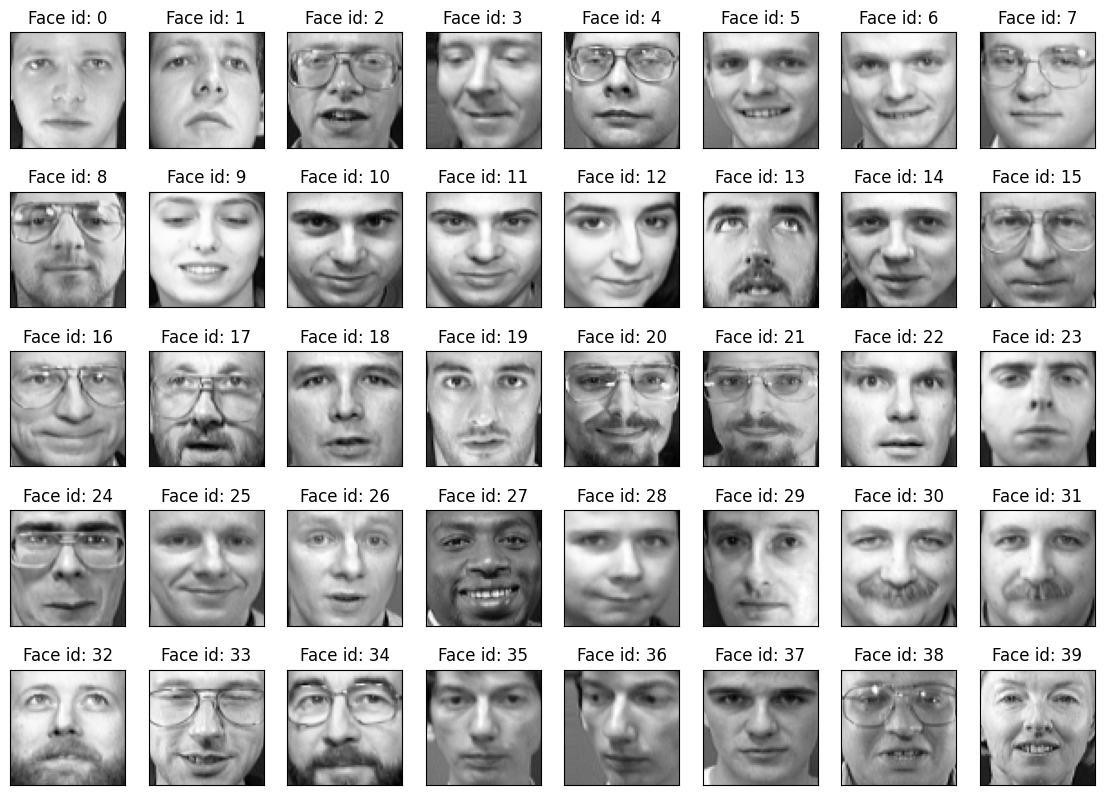

In [16]:
#visualize dataset for each person. There are 40 people and 400 images, that means 10 images per person.
fig, sub_plots = plt.subplots(nrows=5, ncols=8, figsize=(14,10))
sub_plots = sub_plots.flatten()
for unique_user_id in np.unique(targets):
    image_index = unique_user_id * 8
    sub_plots[unique_user_id].imshow(features[image_index].reshape(64, 64), cmap='gray')
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_yticks([])
    sub_plots[unique_user_id].set_title(f"Face id: {unique_user_id}")

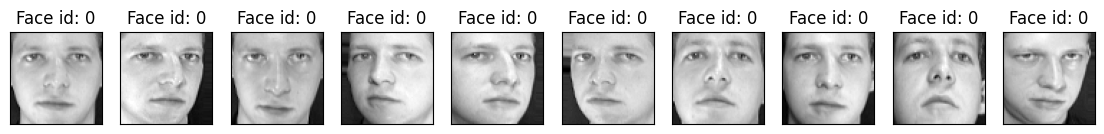

In [17]:
#visualize first persons photos
fig, sub_plots = plt.subplots(nrows=1, ncols=10, figsize=(14,10))
for j in range(10):
    sub_plots[j].imshow(features[j].reshape(64, 64), cmap='gray')
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
    sub_plots[j].set_title('Face id: 0')

In [18]:
#split the data for training and test
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=0)

Text(0, 0.5, 'Explained Variance')

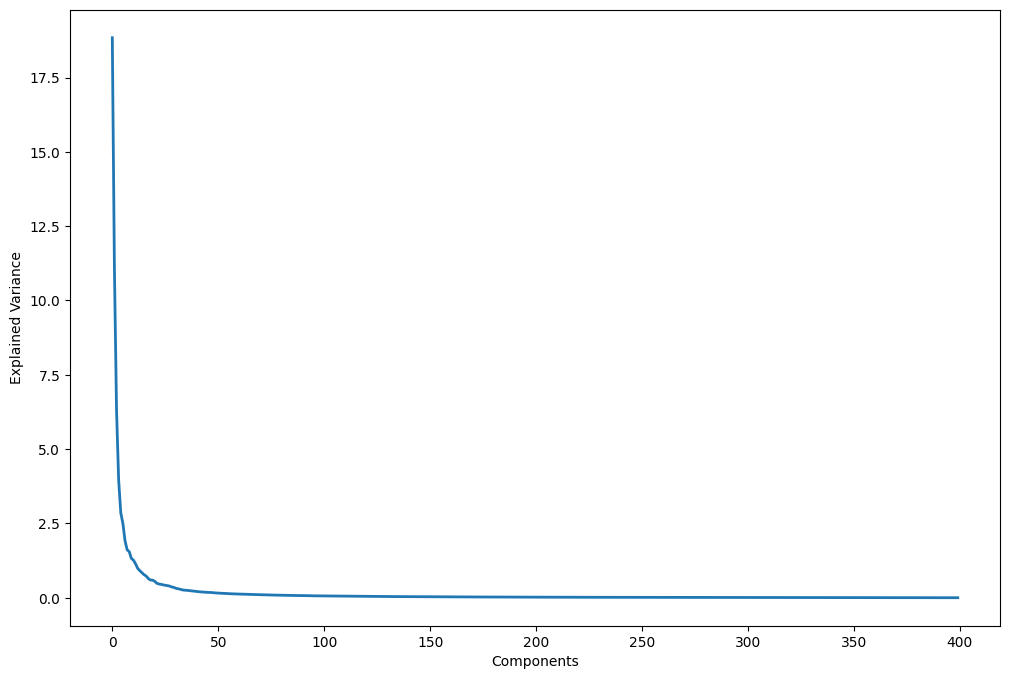

In [19]:
#find optimal number of eigenvectors with PCA
pca = PCA()
pca.fit(features)

plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel("Components")
plt.ylabel("Explained Variance")

It looks like around 100 features is enough to represent our data.

In [20]:
#fit PCA with 100 features and transform dataset
pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Text(0.5, 0.98, 'Eigenfaces')

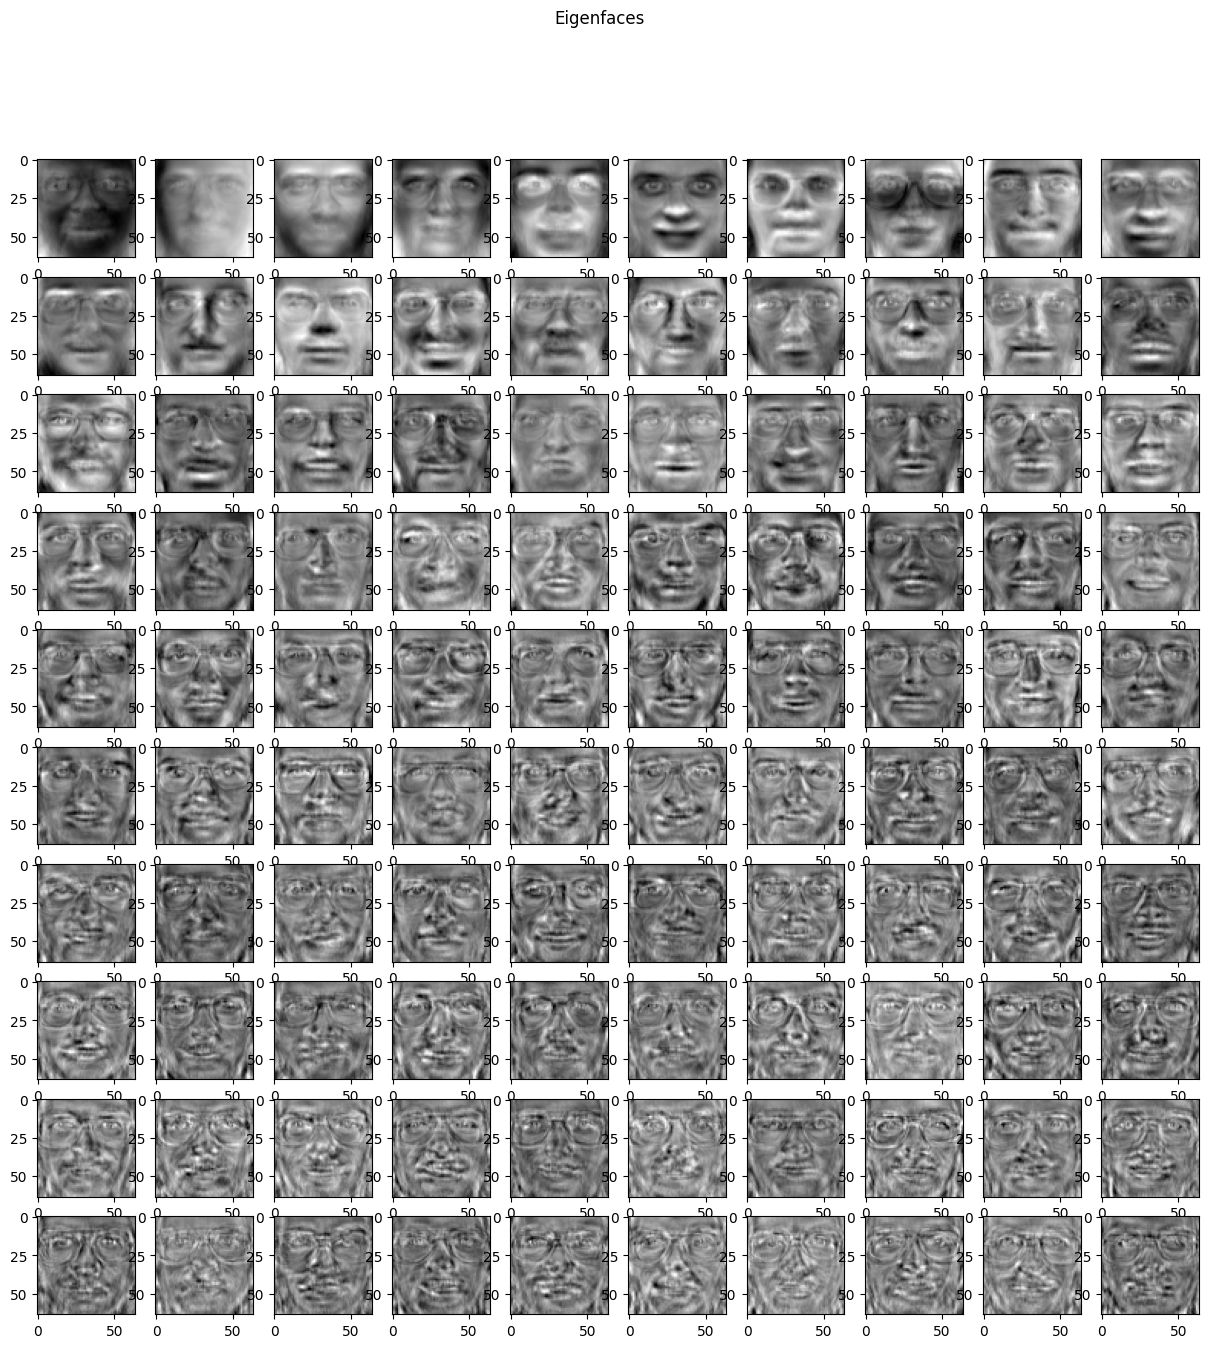

In [23]:
#lets check the PCA transformed versions of photos in the dataset
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))
fig, sub_plots = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
sub_plots = sub_plots.flatten()
for i in range(number_of_eigenfaces):
    sub_plots[i].imshow(eigen_faces[i], cmap='gray')
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
plt.suptitle("Eigenfaces")

In [26]:
#let's use the machine learning models
models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]

for name, model in models:
    classifier_model = model
    classifier_model.fit(X_train_pca, y_train)

    y_pred = classifier_model.predict(X_test_pca)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy score of {name} is {accuracy_score}")


Accuracy score of Logistic Regression is 0.93
Accuracy score of Support Vector Machine is 0.94
Accuracy score of Naive Bayes Classifier is 0.87


In [27]:
#use cross validation for more reliable accuracy data
X_pca = pca.fit_transform(features)
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(model, X_pca, targets, cv=kfold)
    print("Mean of the cross-validation scores: %s" % cv_scores.mean())


Mean of the cross-validation scores: 0.9324999999999999
Mean of the cross-validation scores: 0.8550000000000001
Mean of the cross-validation scores: 0.76
